In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [8]:
names1880 = pd.read_csv("datasets/babynames/yob1880.txt",names=['name','sex','births'])
print(names1880)

           name sex  births
0          Mary   F    7065
1          Anna   F    2604
2          Emma   F    2003
3     Elizabeth   F    1939
4        Minnie   F    1746
...         ...  ..     ...
1995     Woodie   M       5
1996     Worthy   M       5
1997     Wright   M       5
1998       York   M       5
1999  Zachariah   M       5

[2000 rows x 3 columns]


In [39]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [17]:
# assemble all files into data frame
years = range(1880,2010)

pieces = []
columns = ['name','sex','births']

for year in years :
    path = "datasets/babynames/yob%d.txt" % year
    frame = pd.read_csv(path, names=columns)
    frame['years'] = year
    pieces.append(frame)
    
#concate everything into a single data frame

names = pd.concat(pieces, ignore_index = True)
print(frame)

            name sex  births  years
0       Isabella   F   22222   2009
1           Emma   F   17830   2009
2         Olivia   F   17374   2009
3         Sophia   F   16869   2009
4            Ava   F   15826   2009
...          ...  ..     ...    ...
34597  Zyquarius   M       5   2009
34598      Zyran   M       5   2009
34599    Zyreion   M       5   2009
34600     Zyrian   M       5   2009
34601     Zyvion   M       5   2009

[34602 rows x 4 columns]


In [20]:
total_births = names.pivot_table('births', index= 'years',columns='sex',aggfunc =sum)
print(total_births)

sex          F        M
years                  
1880     90993   110493
1881     91955   100748
1882    107851   113687
1883    112322   104632
1884    129021   114445
...        ...      ...
2005   1843890  1993285
2006   1896468  2050234
2007   1916888  2069242
2008   1883645  2032310
2009   1827643  1973359

[130 rows x 2 columns]


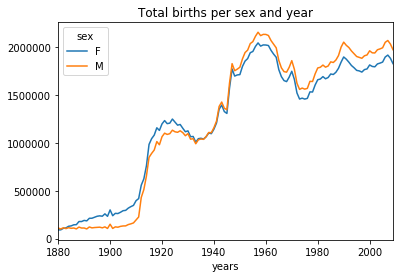

In [22]:
total_births.plot(title='Total births per sex and year')

In [24]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['years','sex']).apply(add_prop)

In [26]:
names.head()

,name,sex,births,years,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [28]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]

grouped = names.groupby(['years','sex'])
top1000 = grouped.apply(get_top1000)


top1000.reset_index(inplace=True,drop=True)

In [29]:
top1000.head()

,name,sex,births,years,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [36]:
#split the 1000 names into boy/girl

boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

total_births = top1000.pivot_table('births', index= 'years',columns='name',aggfunc=sum)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4E95AEFC8>,
      dtype=object)

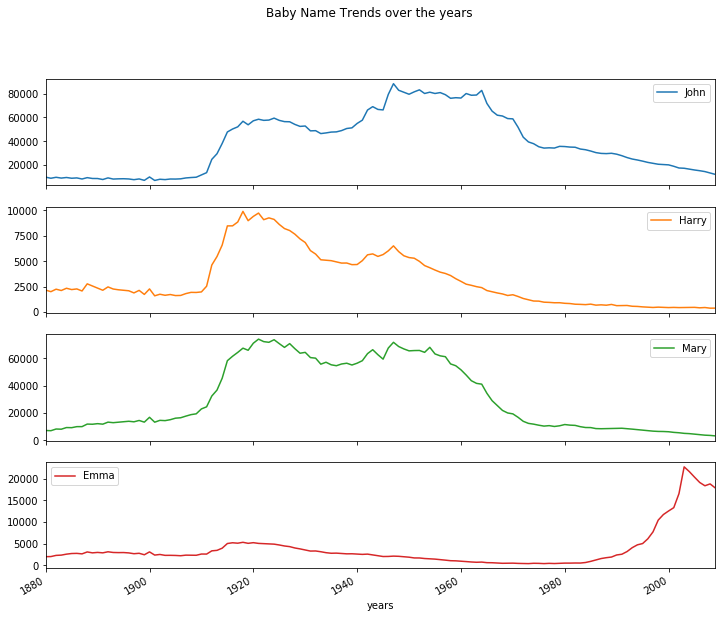

In [37]:
#plot baby name trends for John, Mary, Harry and Emma
subset = total_births[['John','Harry','Mary','Emma']]
subset.plot(subplots=True, figsize=(12,10),grid=False, title="Baby Name Trends over the years")

In [42]:
#baby names taht became girl names (and vice versa)

all_names = pd.Series(top1000.name.unique())

lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [43]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    368871
Lesly       9565
Name: births, dtype: int64

In [45]:
#aggregate by sex and year and normalize within year
table = filtered.pivot_table('births',index='years',columns='sex',aggfunc=sum)

table = table.div(table.sum(1),axis =0)
table.head()

sex,F,M
years,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


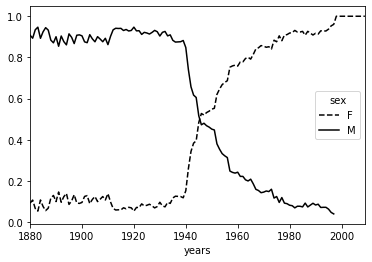

In [46]:
#plot the graphs
table.plot(style={'M':'k-', 'F':'k--'})